# Author - Mukesh kumar
## The Spark foundation - Data Science-Buisness Analytics Internship

###  Task 1 : Simple linear regression 
- __Predict the percentage of an student based on the no. of study hours.__

In [2]:
# import warnings for ignoring the warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Importing some important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Step1: Reading and Understanding the Data

In [117]:
# reading the data from provide url
url= "http://bit.ly/w-data"
df =pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [10]:
# Checking the shape of the data
print(f"Rows: {df.shape[0]}")
print(f"Column: {df.shape[1]}")

Rows: 25
Column: 2


In [11]:
# checking the information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [12]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Step 2: Exploratory data analysis

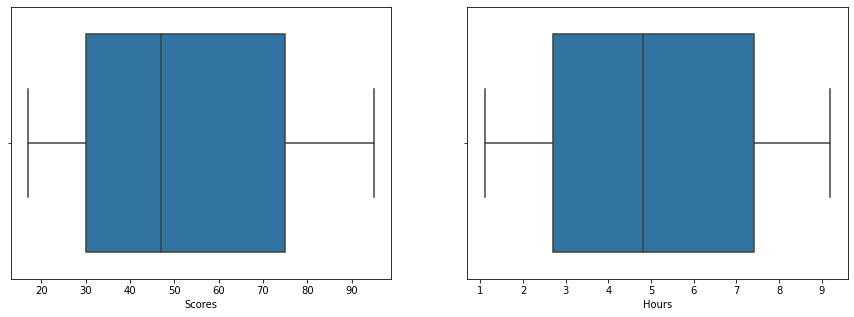

In [22]:
# lets check the outliers
plt.figure(figsize=(15,5))

# for scores
plt.subplot(1,2,1)
sns.boxplot(df.Scores)

# for hours
plt.subplot(1,2,2)
sns.boxplot(df.Hours)

plt.show()

__It Seems that there is no outlier in our dataset__

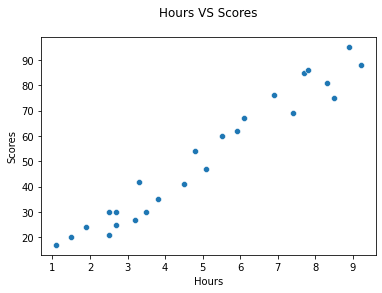

In [29]:
# plotting graph betweeen Scores and Hours
sns.scatterplot(data=df,x="Hours",y="Scores")
plt.title("Hours VS Scores\n")
plt.show()

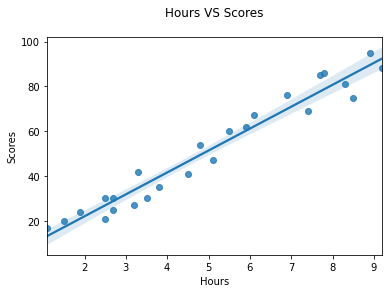

In [28]:
# plotting this to get the best fit line
sns.regplot(data=df,x="Hours",y="Scores")
plt.title("Hours VS Scores\n")
plt.show()

__From  the above two graphs we saw that both the variables are highly correlated__

### Correlation 

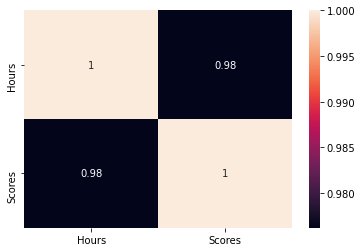

In [32]:
sns.heatmap(df.corr(),annot=True);

__From the above heatmap we saw that Correlation is very between Scores and Hours__

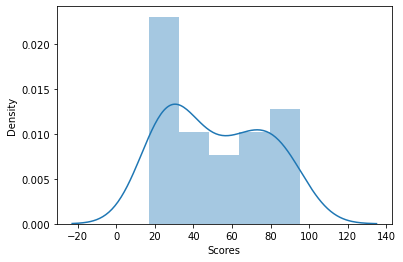

In [38]:
# Checking the distribution of the scores
sns.distplot(df.Scores,bins=5);

- From the above graph we saw that the Scores data is normally distributed 
    - So we now perform __LINEAR REGRESSION__ on our data

# Step 3: Perform Simple linear Regression

- First split the data in X and y according to their dependent and independent nature of variable:
        - Score is depend on number of Hours you study, So put Score the variable in y
        - Hours is an independent variable, So it should be put in X.

In [65]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

In [66]:
X.shape

(25, 1)

# Train test split

## For further steps first we have to split the data into train and

In [93]:
# for this step we have to import one library
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size = 0.2,random_state=42)

In [94]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20, 1)
(20,)
(5, 1)
(5,)


In [95]:
X_train

array([[2.7],
       [3.3],
       [5.1],
       [3.8],
       [1.5],
       [3.2],
       [4.5],
       [8.9],
       [8.5],
       [3.5],
       [2.7],
       [1.9],
       [4.8],
       [6.1],
       [7.8],
       [5.5],
       [7.7],
       [1.1],
       [7.4],
       [9.2]])

In [96]:
y_train

array([25, 42, 47, 35, 20, 27, 41, 95, 75, 30, 30, 24, 54, 67, 86, 60, 85,
       17, 69, 88], dtype=int64)

In [97]:
X_test


array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9]])

In [98]:
y_test

array([81, 30, 21, 76, 62], dtype=int64)

# Step 4 : Now we go for Training the linear regression model

In [99]:
# for this we have to import one library
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# fitting the model
lr.fit(X_train,y_train)
print("Coeff",lr.coef_)
print("intercept",lr.intercept_)

Coeff [9.68207815]
intercept 2.826892353899737


#### Ploting the regression line


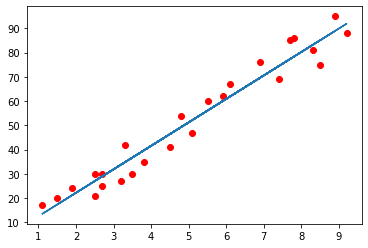

In [100]:
l1 = lr.coef_*X+lr.intercept_
plt.scatter(X,y,c="r")
plt.plot(X,l1)
plt.show()

# Checking the Accuracy score for both training as well as test dataset

In [101]:
print("Training Score ",lr.score(X_train,y_train)*100)
print("Test Score", lr.score(X_test,y_test)*100)

Training Score  94.91209376364415
Test Score 96.78055545167994


# Step 5: Prediction on the test set

In [111]:
y_pred = lr.predict(X_test)
print("y_pred:",y_pred)

y_pred: [83.18814104 27.03208774 27.03208774 69.63323162 59.95115347]


In [103]:
frame = pd.DataFrame({"Actual":y_test,"predictive":y_pred})
frame

,Actual,predictive
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


# we are done with our model 
## let's test this model
    - If a student study 9 hours a day:
        - What will be her/him score.

In [113]:
hours = 9.25
score =lr.predict([[hours]])
score

array([92.38611528])

In [114]:
print("Number of study hours = ",hours)
print("Predictive score = ", score[0])

Number of study hours =  9.25
Predictive score =  92.38611528261494


# Step 6 : Final evaluating the model
 - The final step is to evaluate the performance of algorithm. This step is quite important to compare how well different algorithms perform on a particular dataset. we have chosen the mean square error. Also, there are many such metrics which we can choose.

In [112]:
from sklearn import metrics

__Mean absolute error__

In [115]:
print("Mean Absolute error :",metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute error : 3.9207511902099244


__Mean squared error__

In [116]:
print("Mean squared error :",metrics.mean_squared_error(y_test,y_pred))

Mean squared error : 18.943211722315272


That means that the model doing great linear model as less MAE and good R-Square value

## Conclusion:

 - After Analysing the dataset we got Predicted score around 92 based on the number of study hours i.e., 9.25 hrs/day.
 
 

**----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

-------------------------------------------------------------------------------`**End Of Note Book**`----------------------------------------------------------------------------------------------

**----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**